In [1]:
import numpy as np
import matplotlib.pyplot as plt


a = 0.003595000000000002 m^2
b = -0.002075 m^2
incertitude sur a :  0.00023094010767585029 m^2
incertitude sur b :  -0.0008948929172439199 m^2


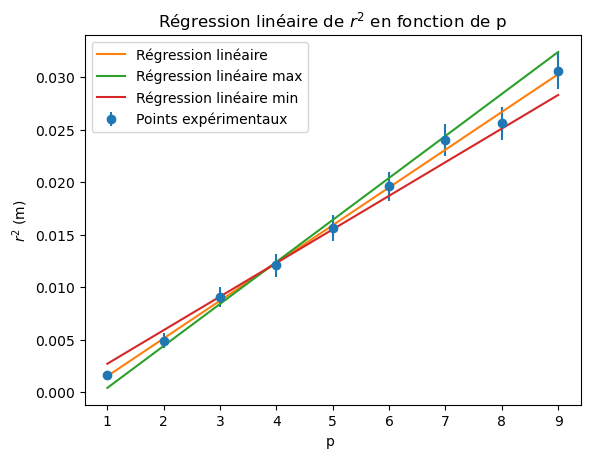

In [20]:
p=np.arange(1, 10, 1) # ordres d'interférence
r=np.array([4, 7, 9.5, 11, 12.5, 14, 15.5, 16, 17.5]) # r en cm
r_m=0.01*r # r en m
r_carré=r_m**2 # On s'intéresse à r^2

r_incertitude = np.linspace(0.5, 0.5, len(r)) # Incertitude sur r
r_incertitude_m = 0.01*r_incertitude # Incertitude sur r en m
r_carré_incertitude = 2*r_m*r_incertitude_m # Incertitude sur r^2 (directement de la formule des incertitudes produit: u(r^2) = 2*r*u(r)  )

# Régression linéaire
a, b = np.polyfit(p, r_carré, 1) # p: abscisse, r_carré: ordonnée, 1: degré du polynôme
print('a =', a, 'm^2')
print('b =', b, 'm^2')


# Incertitude sur les paramètres de la régression linéaire
incertitudes=True
if incertitudes: 
    # METHODE 1 : avec polyfit : 
    methode_1=False
    if methode_1: 
        # On récupère les paramètres de la régression linéaire
        a, b = np.polyfit(p, r_carré, 1, cov=True)[0] # p: abscisse, r_carré: ordonnée, 1: degré du polynôme, cov=True pour récupérer la matrice de covariance
        # On récupère la matrice de covariance
        cov_ab = np.polyfit(p, r_carré, 1, cov=True)[1]
        # On récupère les incertitudes sur les paramètres
        u_a = np.sqrt(cov_ab[0,0])
        u_b = np.sqrt(cov_ab[1,1])
        plt.fill_between(p, (a-u_a)*p + (b-u_b), (a+u_a)*p + (b+u_b), color='gray', alpha=0.5, label='Incertitude sur la régression linéaire')
        print('incertitude sur a : ', u_a, 'm^2')
        print('incertitude sur b : ', u_b, 'm^2')

    # Methode 2 : à la main :
    methode_2=True
    if methode_2: 
        b_max=-0.0036
        a_max=0.004
        b_min=-0.0005
        a_min=0.0032
        print('incertitude sur a : ', (a_max-a_min)/(2*np.sqrt(3)), 'm^2')
        print('incertitude sur b : ', (b_max-b_min)/(2*np.sqrt(3)), 'm^2')
        plt.errorbar(p, r_carré, yerr=r_carré_incertitude, fmt='o', label= 'Points expérimentaux')
        plt.plot(p, a*p + b, label='Régression linéaire')
        plt.title(r'Régression linéaire de $r^2$ en fonction de p')
        plt.ylabel(r'$r^2$ (m)')
        plt.xlabel(r'p ')
        plt.plot(p, a_max*p + b_max, label='Régression linéaire max')
        plt.plot(p, a_min*p + b_min, label='Régression linéaire min')
        plt.legend()
        plt.show()

else: 
    plt.errorbar(p, r_carré, yerr=r_carré_incertitude, fmt='o', label= 'Points expérimentaux')
    plt.plot(p, a*p + b, label='Régression linéaire')
    plt.title(r'Régression linéaire de $r^2$ en fonction de p')
    plt.ylabel(r'$r^2$ (m)')
    plt.xlabel(r'p ')
    plt.legend()

    plt.show()